# Introduction

Clustering involves the grouping of data points or items based on their shared similarities, which are typically quantified using distance measures that calculate the extent of separation between two data points. Two commonly used distance measures are the Euclidean and Manhattan distances.

The most prevalent types of clustering algorithms are:
K-Means Clustering: This is an exclusive clustering technique, where each data point belongs to only one cluster. With K-Means, the data points are grouped into a predetermined number, K, of clusters.

Hierarchical Clustering: This method organizes data points or items into groups in a hierarchical fashion, creating a tree-like structure of clusters. Unlike K-Means, hierarchical clustering does not require specifying the number of clusters in advance, offering more flexibility in clustering analysis.

In this analysis we will use both KMean and Hierarchical clustering to
1. Segregate the customers into clusters/group
2. provide recommendations to a retail manager based on the identified customer segments.

## Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Arising Questions:
1.  How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.
2. Who are your target customers with whom you can start marketing strategy [easy to converse]
3. How the marketing strategy works in real world

# Customer Segmentation and Analysis
Steps to solve the problem :
1. Importing Libraries.
2. Exploration of data.
3. Data Visualization.
4. Clustering using K-Means.
5. Selection of Clusters.
6. Ploting the Cluster Boundry and Clusters.
7. 3D Plot of Clusters.

## Dataset
The customer dataset is a learning dataset from kaggle. It comprises of five features( CUstomerID, Gender,
Age, Annual Income and Spending Score) with 200 rows. Spending score ranges from 0 to 100 and is
assigned to a customers based on criteria such as purchase quantity and amount.

## 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
%matplotlib inline


In [5]:
from sklearn.cluster import KMeans

In [6]:
import warnings

In [7]:
import os

In [8]:
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

## 2. Exploring data

In [9]:
customers = pd.read_csv("Mall_Customers.csv")

In [10]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customers.shape

(200, 5)

In [13]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [14]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 3. Data Visualisation

In [16]:
plt.style.use('fivethirtyeight')

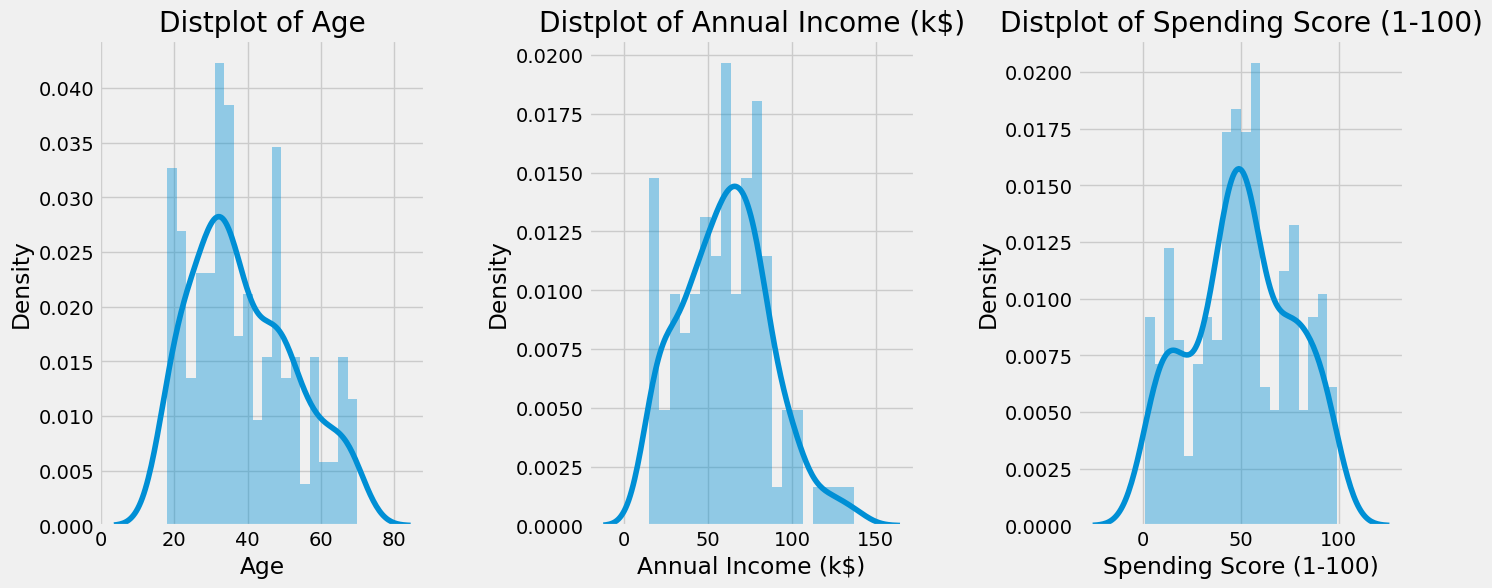

In [17]:
#Plot histograms
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(customers[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

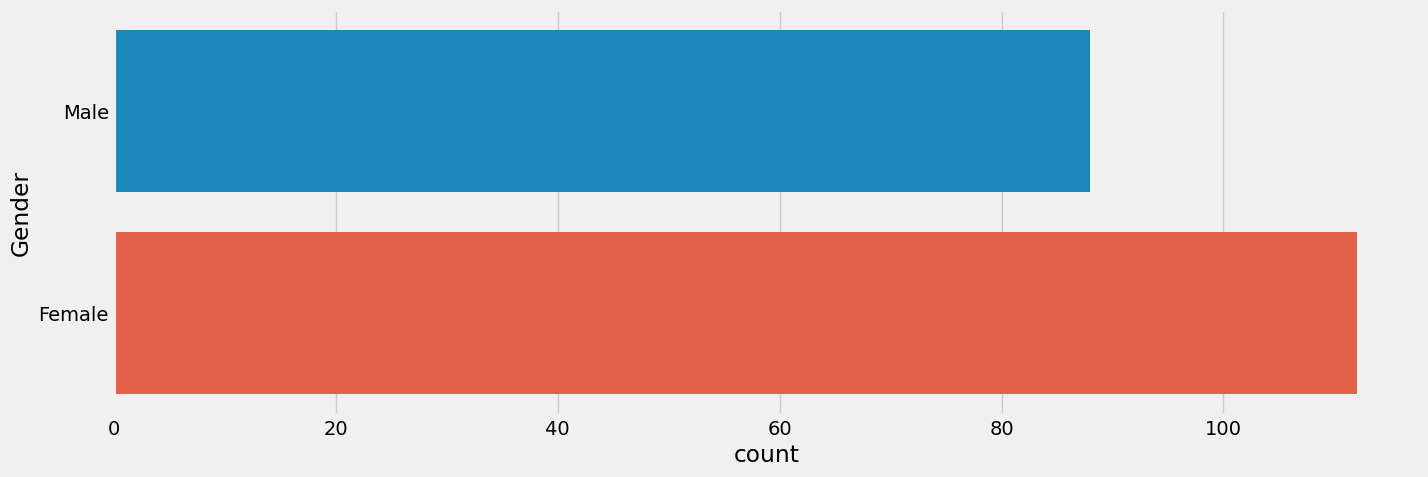

In [18]:
#Count plot of Gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = customers)
plt.show()

In general there are more women than men in the analysis

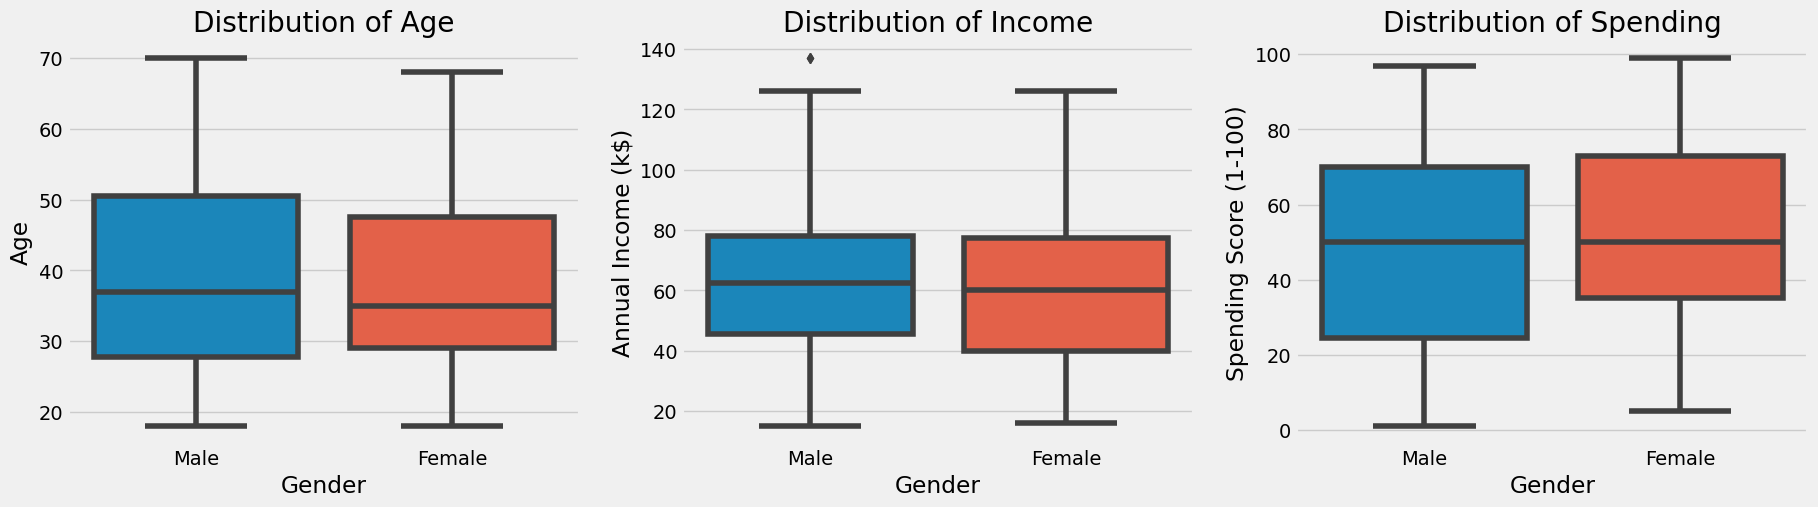

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=customers.Gender, y=customers.Age)
plt.title('Distribution of Age')

plt.subplot(1,3,2)
sns.boxplot(x=customers.Gender, y=customers['Annual Income (k$)'])
plt.title('Distribution of Income')

plt.subplot(1,3,3)
sns.boxplot(x=customers.Gender, y=customers['Spending Score (1-100)'])
plt.title('Distribution of Spending')
plt.show()


There is no general trend or statistical significance between genders

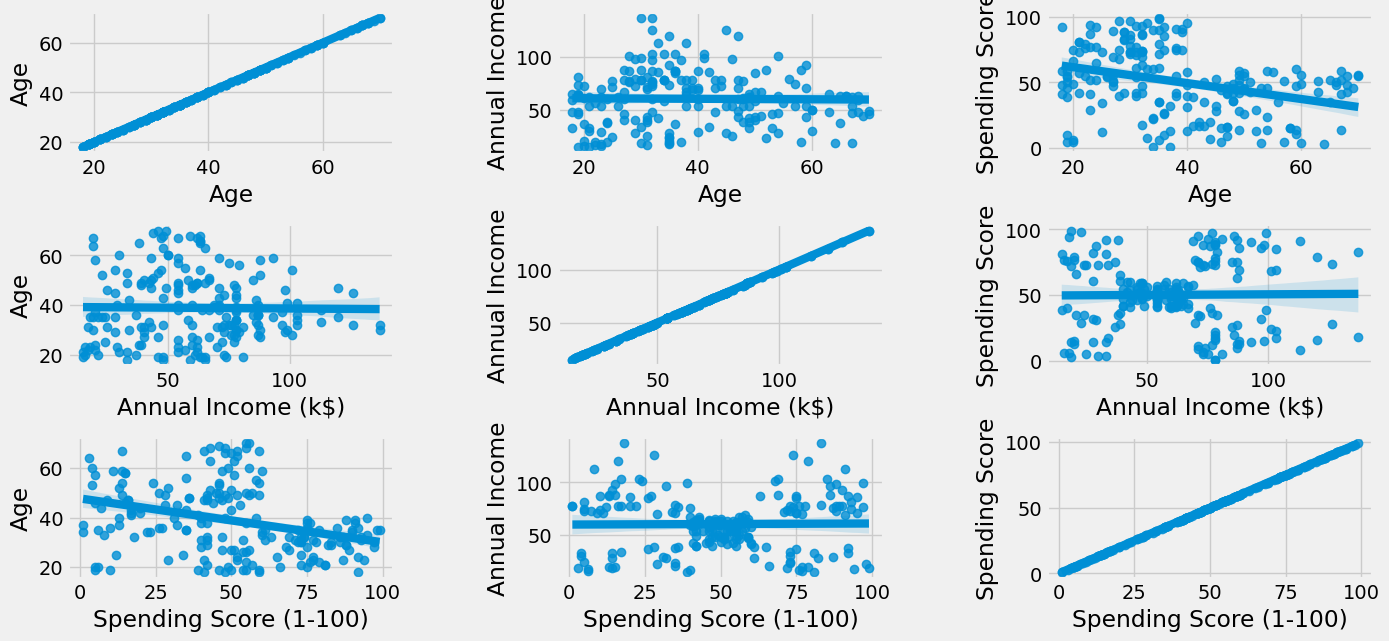

In [19]:
#Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = customers)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()


There is a negative trend of age and spending score: With people younger than 40 years having a higher score, thus spending more and older people have the tendensy to spend less.

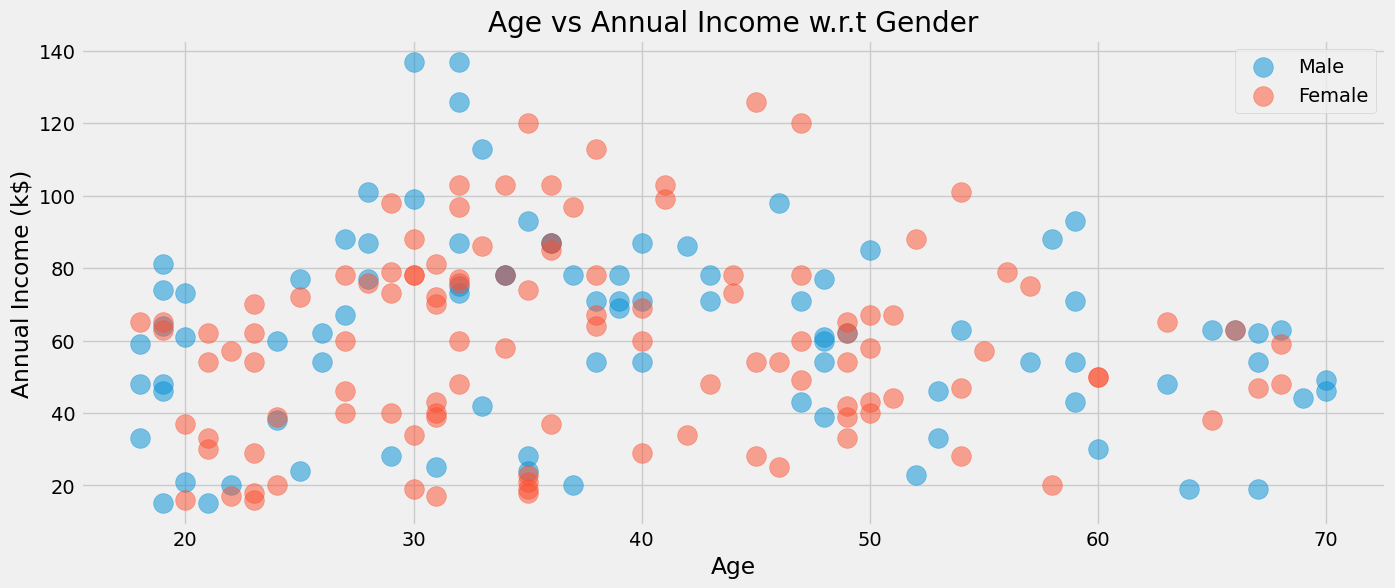

In [20]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = customers[customers['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

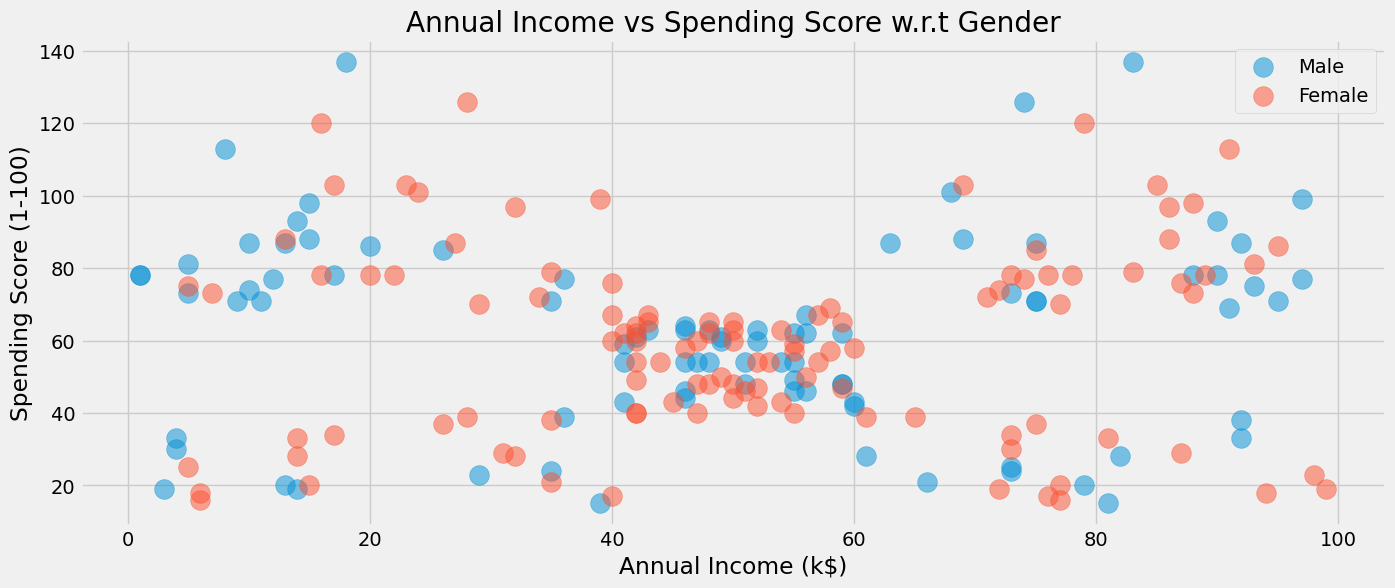

In [21]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Spending Score (1-100)',y = 'Annual Income (k$)' ,
                data = customers[customers['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

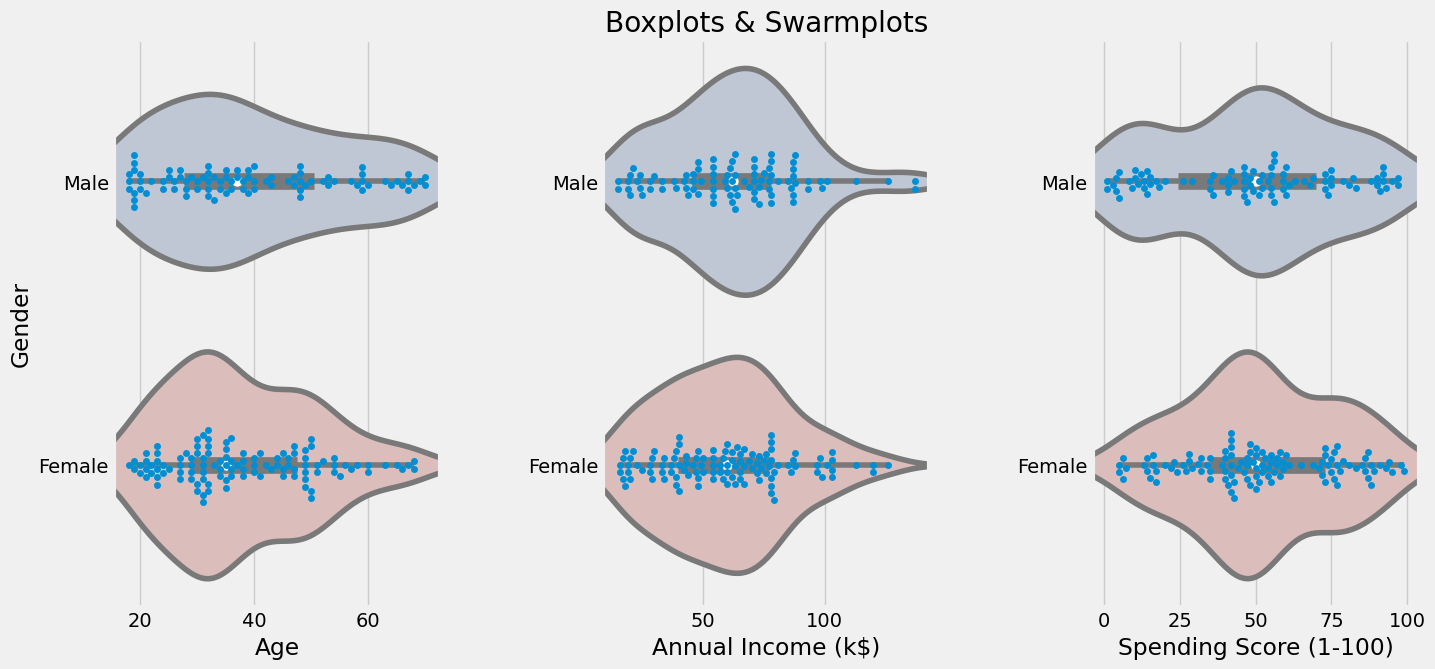

In [22]:
#Distribution of values in Age , Annual Income and Spending Score according to Gender
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = customers , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = customers)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()


There are slighly younger group of women in the dataset, with almost equal swarmplots the annual income between male and female population. 

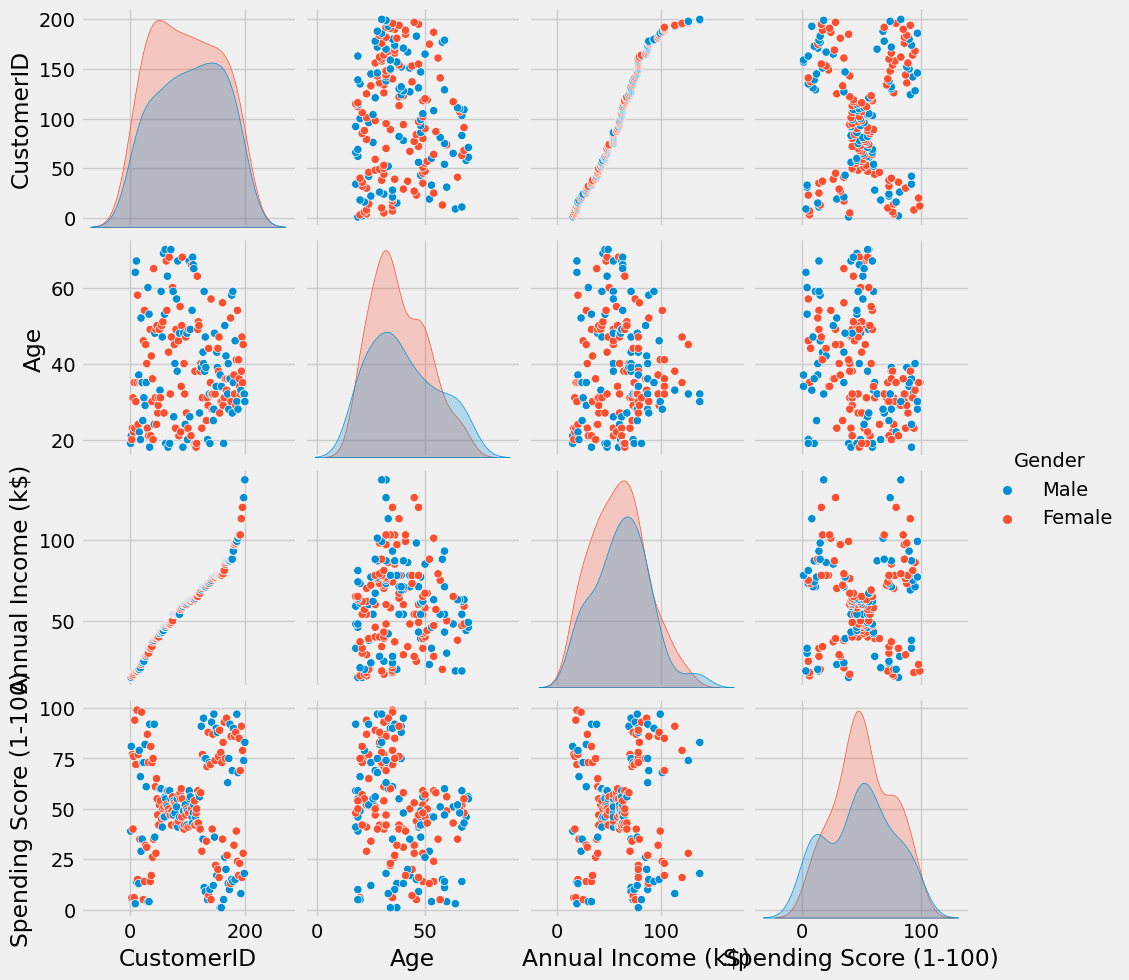

In [23]:
sns.pairplot(customers, hue="Gender")

## 4. Clustering /  Selection of Clusters / Plotting Clustering and Boundry

### Clustering using K-means

1. Segmentation using Age and Spending Score

In [24]:
'''Age and spending Score'''
X1 = customers[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 1  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)

To find the optimal number of clusters, I will try different values of  𝑘 and calculate the inertia, or distortion score, for each model. Inertia measures the cluster similarity by computing the total distance between the data points and their closest cluster center. Clusters with similar observations tend to have smaller distances between them and a lower distortion score overall.

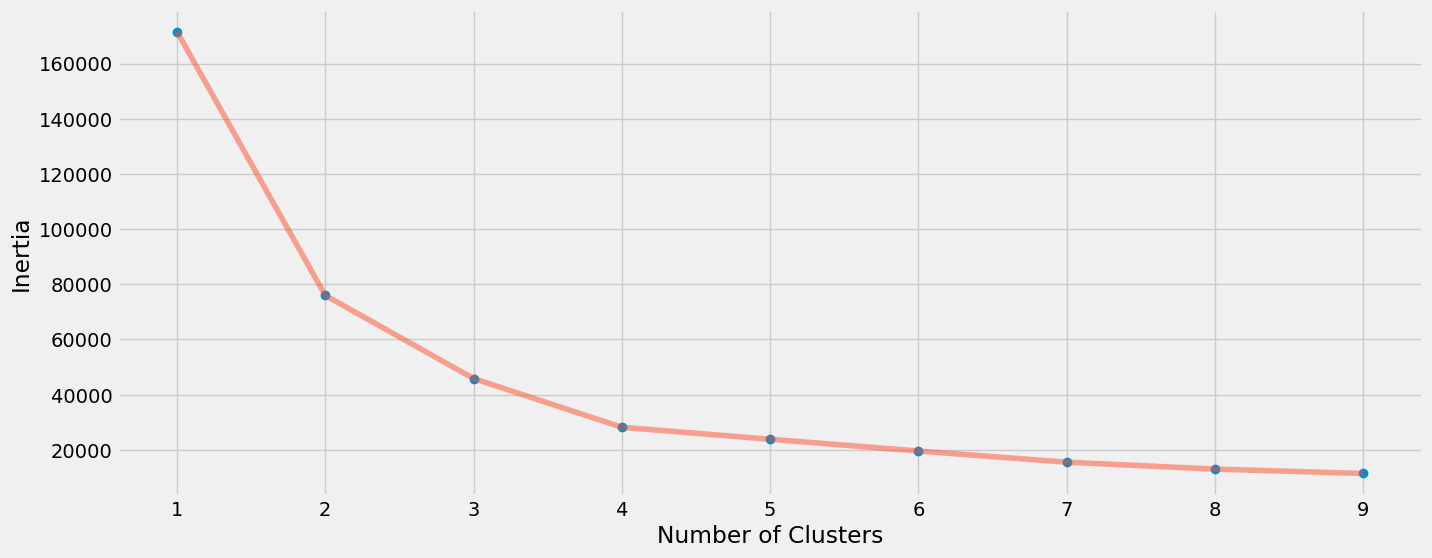

In [25]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [26]:
#Run algorithm and fit X1 data
#Have chosen 4 clusters to run and evaluate the algorithm
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 1  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [27]:
#Use a mesh in the background 
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


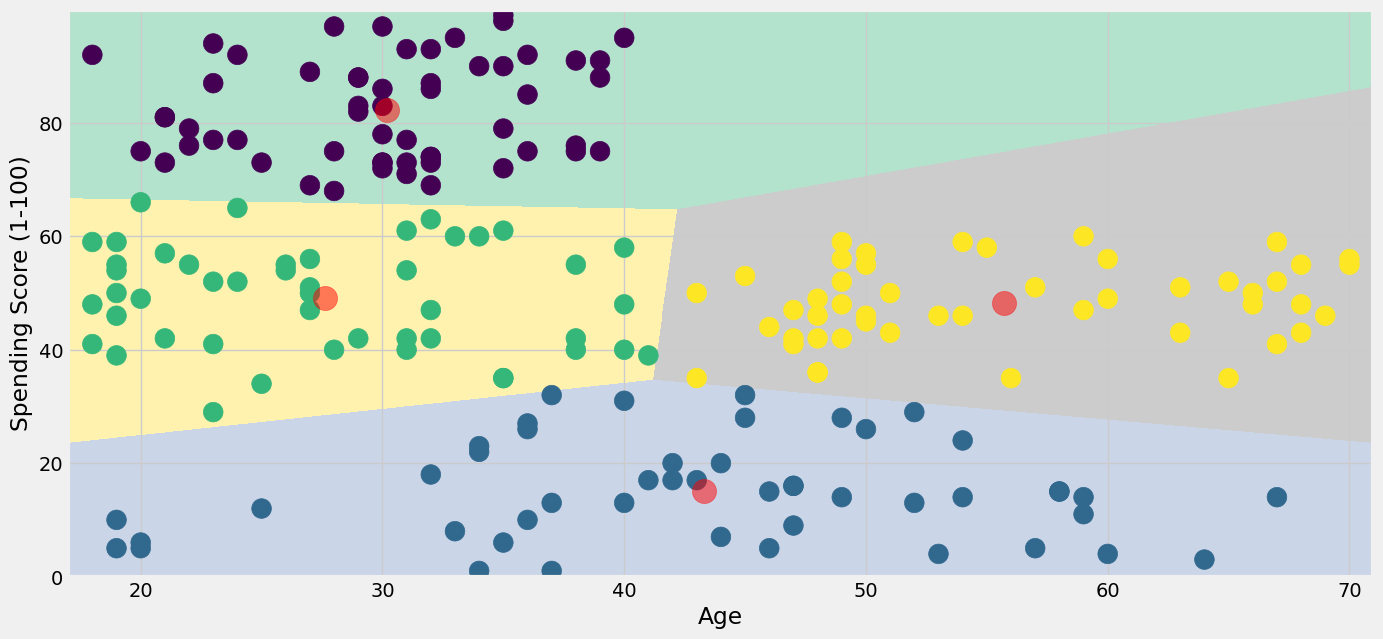

In [28]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = customers , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

- The K-Means model segments the data into distinct clusters based on customer's spending and income. Cluster 0 in the center of the graph consists of customers with average spending scores, between 35-61, and incomes between $40,000 and $71,000. The two clusters on the left, Clusters 1 and 3, both identify customers with lower spending scores that are below 40 and subdivides the groups according to their income. In contrast, Clusters 2 and 4 consist of customers with higher spending scores, above 61, and are further partitioned based on their income.

2. Segmentation using Annual Income and Spending Score


In [29]:
'''Annual Income and spending Score'''
X2 = customers[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)


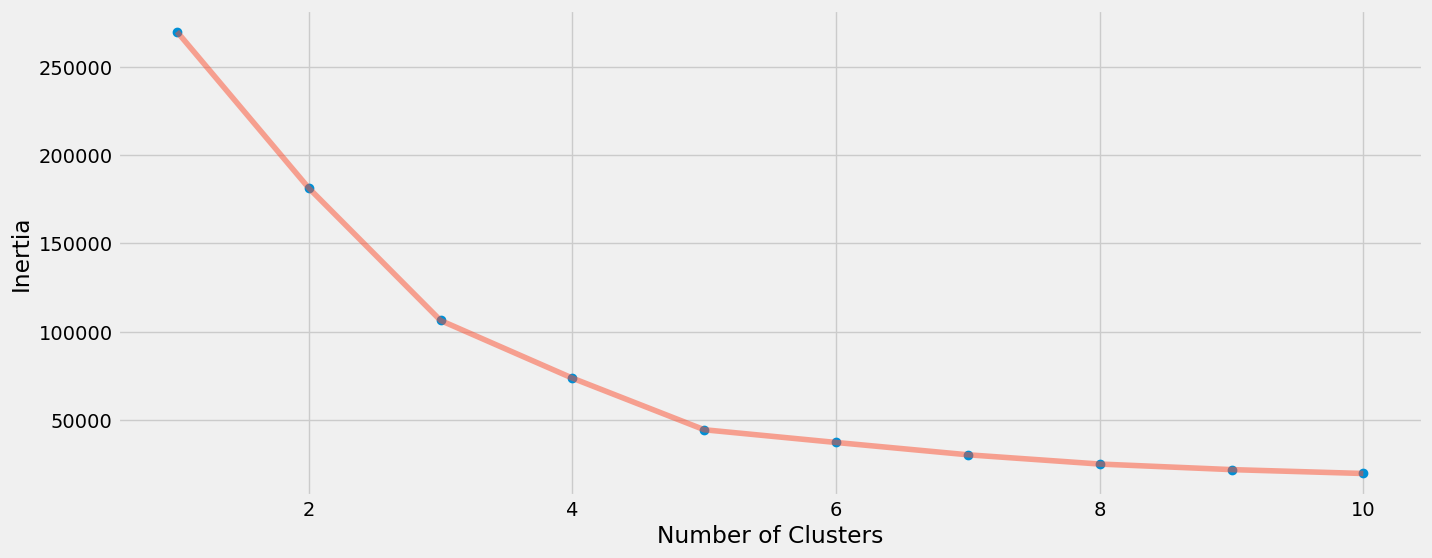

In [30]:
#Plot number of clusters vs inertia to find 

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [31]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [32]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

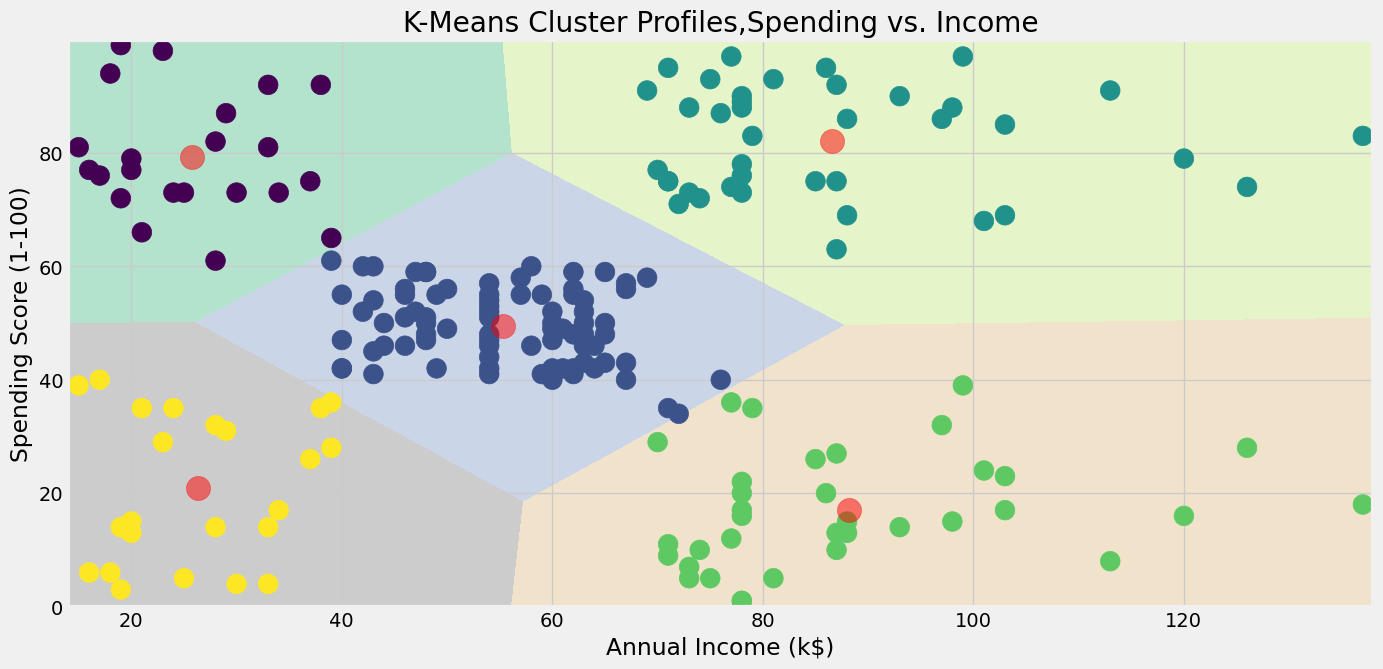

In [59]:
#Plot the 5 clusters between spending score and annual income and their centroits
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.title ("K-Means Cluster Profiles,Spending vs. Income")
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = customers , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

## HIERARCHICAL CLUSTERING

This clustering approach aims to arrange data points or items in a hierarchical structure. There are two
primary hierarchical clustering methods: Agglomerative and Divisive. Data points within the same clusters
are considered similar based on a distance measure, and clusters are merged using a linkage method.
Common linkage methods include the single linkage method, compound linkage method, ward linkage
method, among others.


In this analysis, we have utilized the Euclidean distance measure and specifically chosen the Ward linkage
method. The rationale behind selecting the Ward linkage method is to minimize the variance within clusters
and achieve balanced cluster size. This method helps ensure that the resulting clusters are homogeneous
and have relatively equal sizes.

3.Segmentation using Age , Annual Income and Spending Score


In [34]:
X3 = customers[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

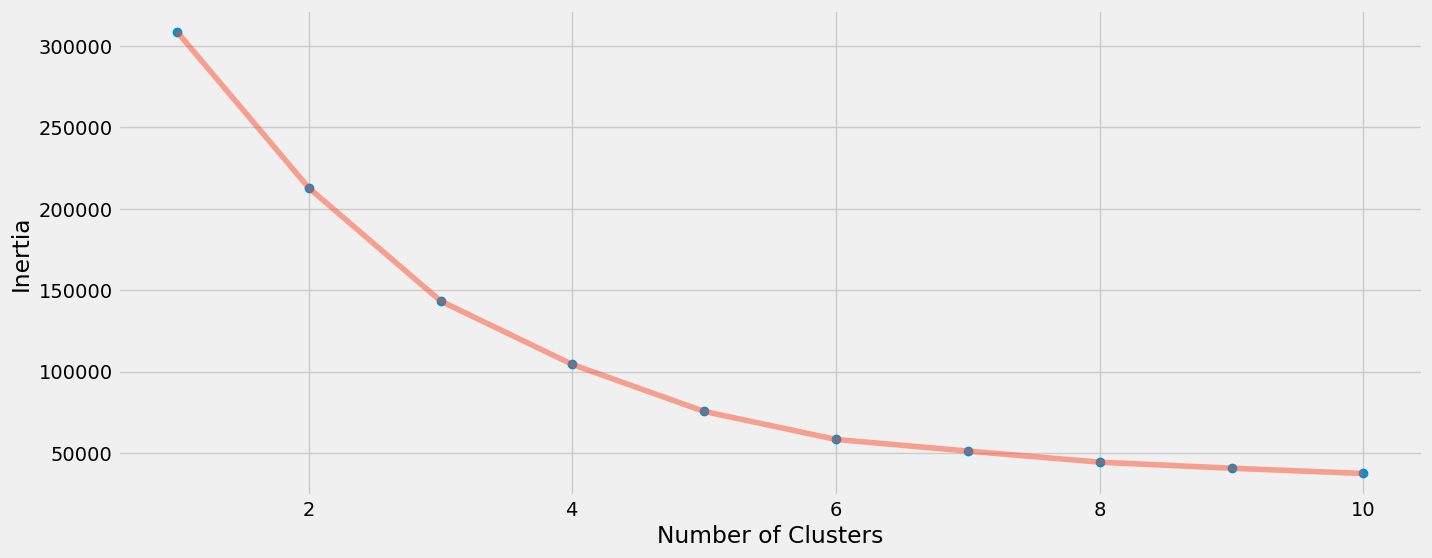

In [35]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [49]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 1  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [50]:
customers['label3'] =  labels3
trace1 = go.Scatter3d(
    x= customers['Age'],
    y= customers['Spending Score (1-100)'],
    z= customers['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = customers['label3'], 
        size= 20,
        line=dict(
            color= customers['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### AGGLOMERATIVE CLUSTERING
In agglomerative hierarchical clustering, the algorithm starts with a bottom-up approach, treating each data point as a separate cluster, and then successively merges the clusters using a linkage method until a single cluster containing all data points is formed.


The model then joins pairs of observations that are most similar to each other based on their Euclidean distance and iteratively combines cluster pairs based on the distances between the groups until all observations have been merged.


Step by Step
1. Preprocess the dataset
2. Select the features needed for the analysis.
3. Construct a dendrogram to aid in selecting the number of clusters
4. Build the model.
5. Visualize the clusters

In [62]:
#constract dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy  import dendrogram, linkage

In [78]:
X4 = customers.iloc[:, [3,4]]
X4
# Create a new algorithm with tthe new dataset: same datesets that were used for the X2 K-mean 

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


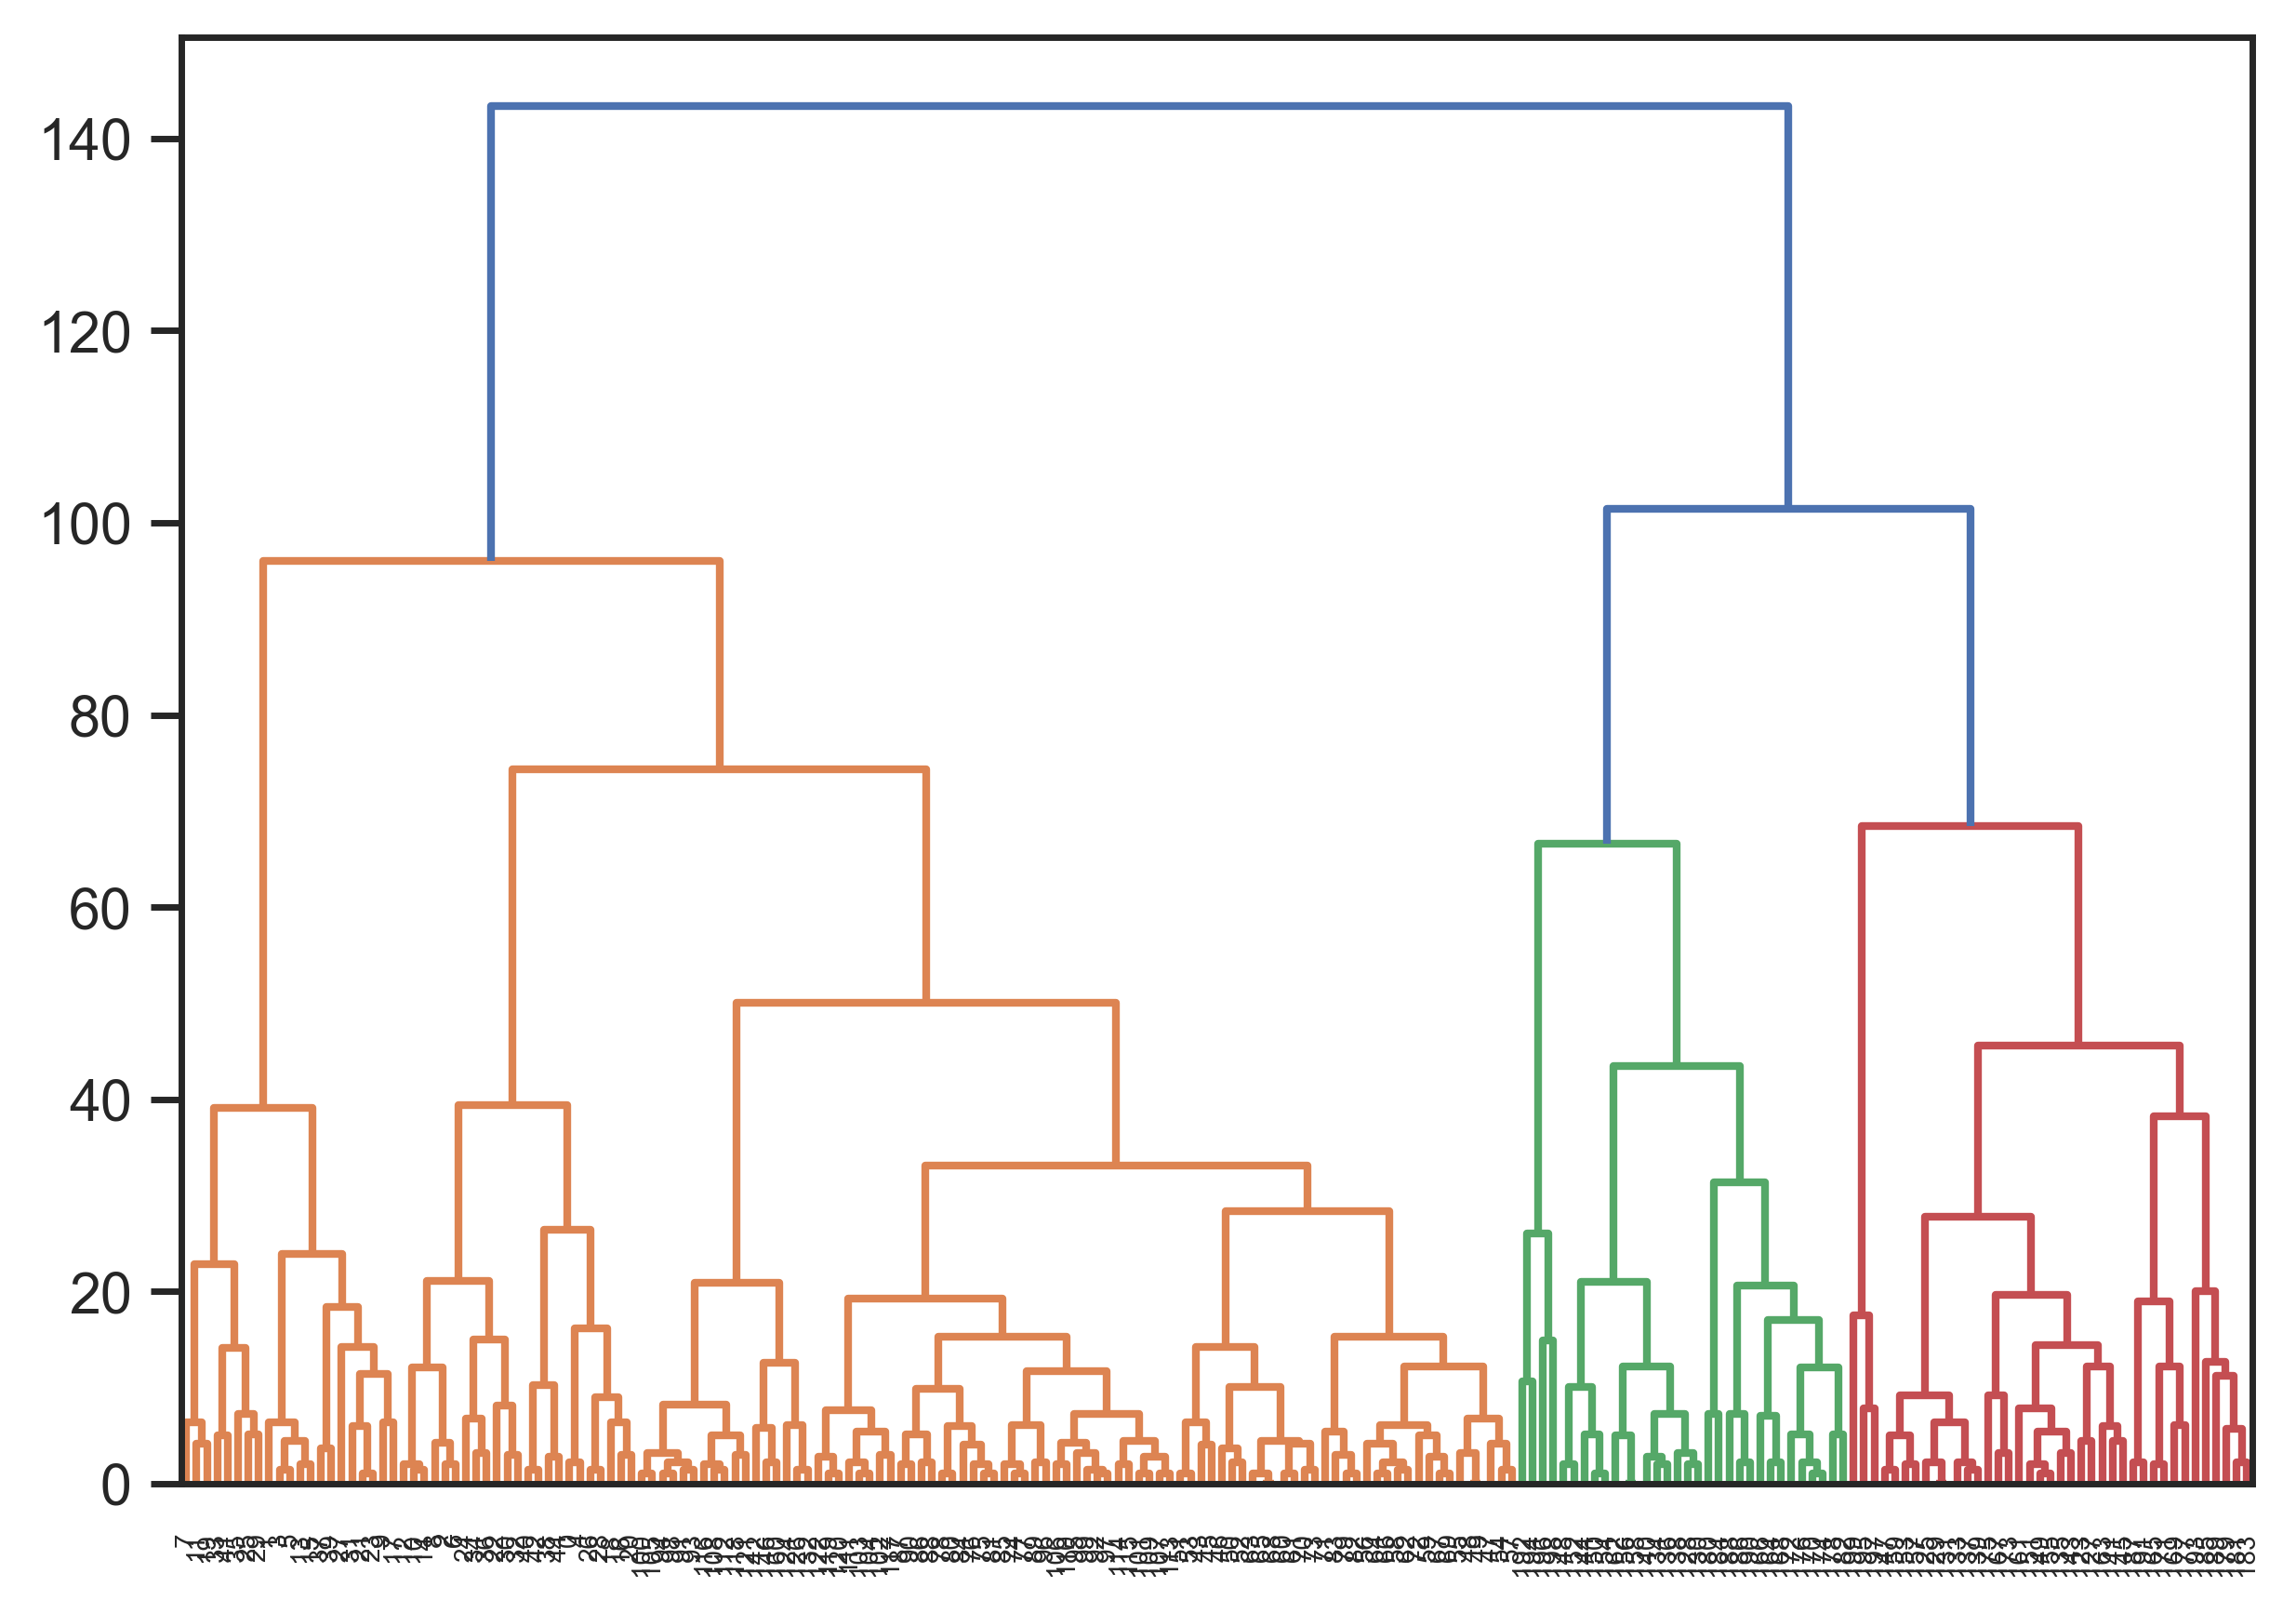

In [80]:
Z = dendrogram(linkage(X2, method='complete', metric='euclidean'))


#### Building the Agglomerative model
Based on the dendrogram we consider 4 clusters to build the model

In [88]:
Agglom_model = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
Agglom_model.fit(X4)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [89]:
y_pred= Agglom_model.fit_predict(X4)
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

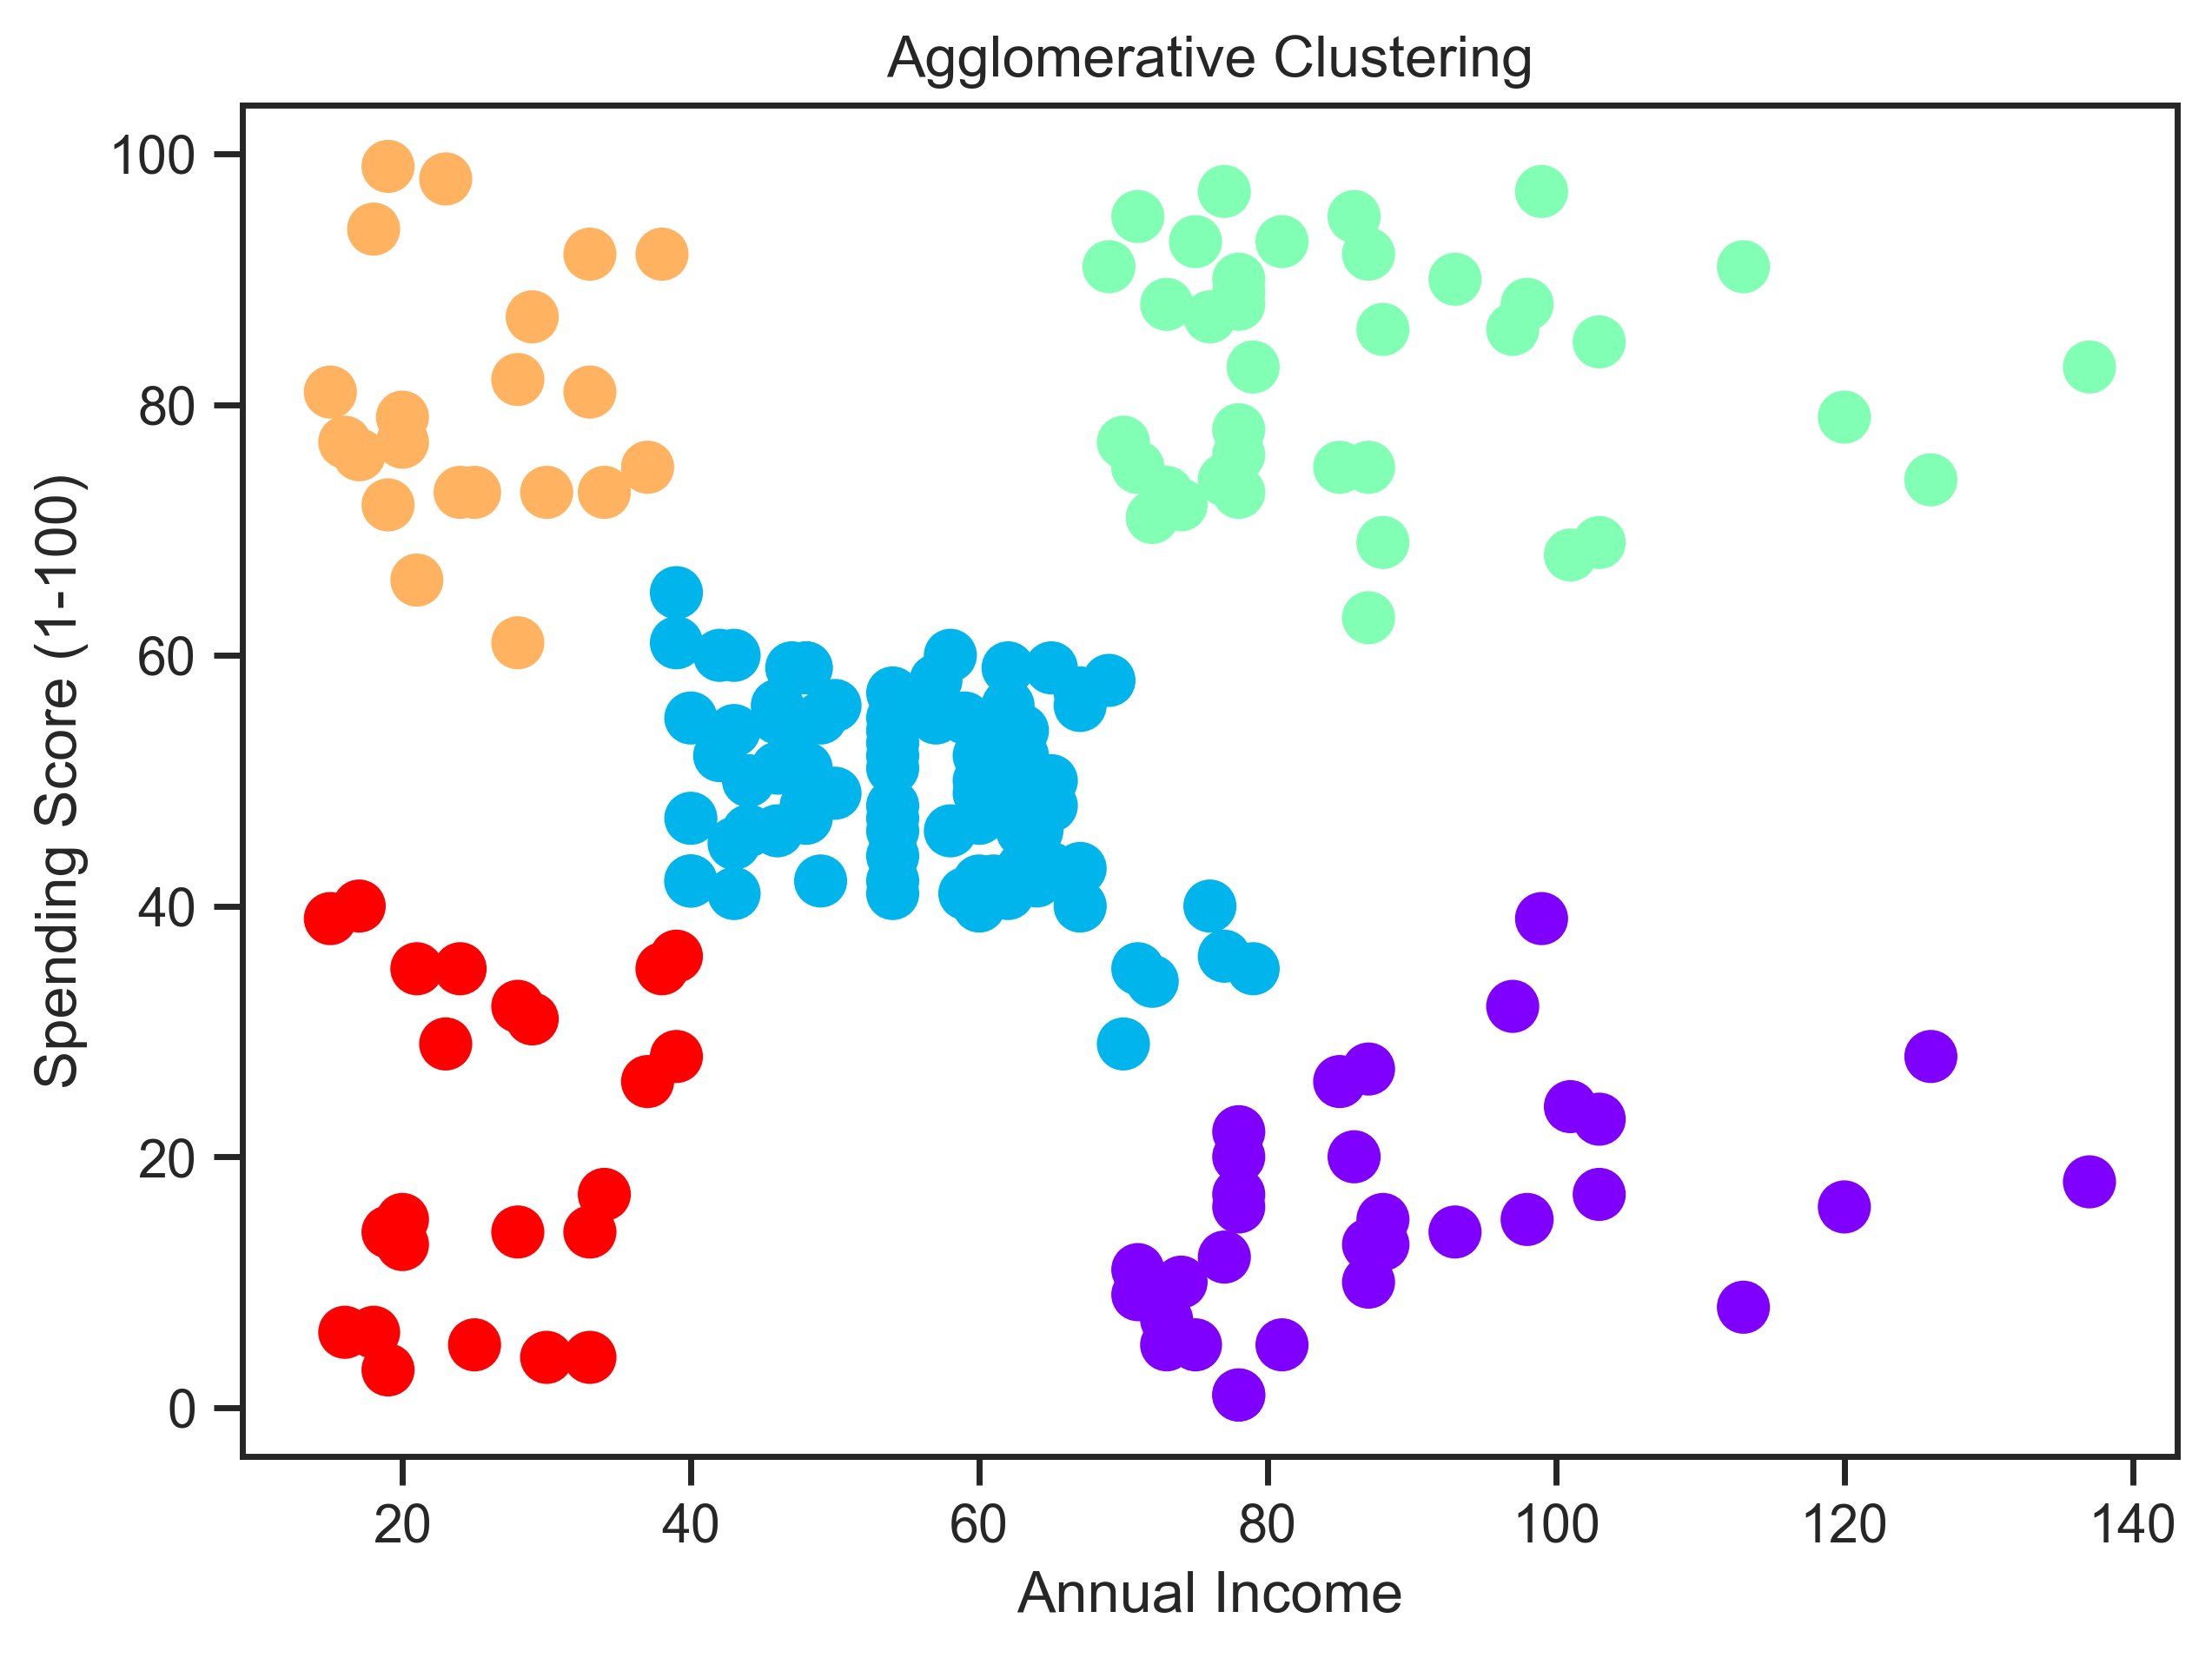

In [90]:
#Visualise the clusters:
cluster_labels = Agglom_model.labels_
plt.scatter(X4['Annual Income (k$)'], new_customer_data["Spending Score (1-100)"],
 c=cluster_labels, cmap='rainbow', s=100)
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)');

In [91]:
# Exctract the customers segments:
X4['y_pred'] = y_pred
segment_1 = X4[X4['y_pred']==0] 
segment_1.head()

,Annual Income (k$),Spending Score (1-100),y_pred
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0


In [92]:
segment_2 = X4[X4['y_pred']==1] 
segment_2.head()

,Annual Income (k$),Spending Score (1-100),y_pred
43,39,61,1
45,39,65,1
46,40,55,1
47,40,47,1
48,40,42,1


In [93]:
segment_3 = X4[X4['y_pred']==2] 
segment_3.head()

,Annual Income (k$),Spending Score (1-100),y_pred
123,69,91,2
125,70,77,2
127,71,95,2
129,71,75,2
131,71,75,2


In [94]:
segment_4 = X4[X4['y_pred']==3] 
segment_4.head()

,Annual Income (k$),Spending Score (1-100),y_pred
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3


## Conclusion

In this analysis, 2 clustering models were developed to explore different types of customers at a supermarket: K-Means Clustering, Hierarchical Clustering. Each model identified distinct customer segments that the company could target depending on their needs. Out of the 2 clustering techniques, the K-Means model  and algomerate model created the most distinguished clusters.

Based on customer spending habits, the company could target customers for their membership card program using the two clusters found in the K-Means model, where customers have higher spending scores above 60 and would likely be more inclined to becoming a member. One of the distinguishing factors between these clusters and the other clusters in the model is that they consist of customers who are under the age of 40, which indicates that the company could aim their membership card marketing program towards customers who are younger than 40 and have higher spending scores. To engage customers with lower spending scores, the company could target these groups with more of their popular products and promotions. 

In the future, to better understand customer preferences, additional data about the frequency and types of purchases made could be used to further customize product offerings to each segment. Individual advertiments could be used for the 5 clusters of customers, to increase the memberships and consequently their spending score.